# CNN for MNIST digits

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
warnings.simplefilter(action='ignore', category=ImportWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=ResourceWarning)

In [3]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical, normalize

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

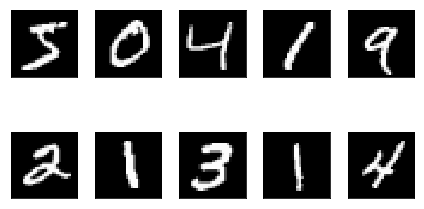

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_data[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3,3), activation='relu',  input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [10]:
model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'])

In [11]:
train_data = train_data.reshape((-1,28,28,1)).astype('float32')/255
test_data = test_data.reshape((-1,28,28,1)).astype('float32')/255

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
%%time
model.fit(train_data, train_labels, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.1705 - acc: 0.9469
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0480 - acc: 0.9856
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0326 - acc: 0.9904
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0251 - acc: 0.9921
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0191 - acc: 0.9941
CPU times: user 31 s, sys: 14.7 s, total: 45.7 s
Wall time: 27.8 s


In [14]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 63us/step


[0.03488868531197204, 0.9897]

In [15]:
pred = np.argmax(model.predict(test_data[:10]), 1)

In [16]:
pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

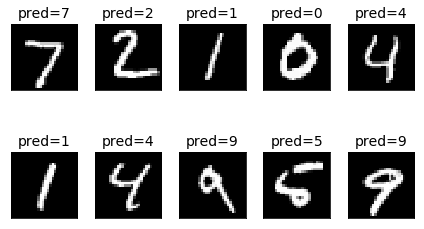

In [17]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_data[i].squeeze(), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title("pred=%d" % pred[i], fontsize=14)
plt.tight_layout()